#### Were made 100 different searchs over the Berlin graph. For each search, each algorithm runs 10 times and in each run I restart the JVM, so we can assurer that no cach is used to give an advantage to any code. Then, I take the mean time for each algorithm and store on a csv file.

#### The elapsed time to generate this data was 9h 45min 22s

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils as ut
from IPython.display import display, HTML, Markdown

## Loading the times generated from tests

The Vanila algorithm is a implementation made by Erick

In [2]:
ut.generateTimes(n_tests=10,operations=["BerlinGraphast","BerlinGraphHopper","BerlinVanila"],save_file="../vanila_test.csv")
df = ut.loadData(file_name="../vanila_test.csv")[["Distance(m)","BerlinGraphHopper","BerlinGraphast"]]
df

['61.9', '115.5', '31.7', '22625']
['153.1', '170.0', '60.0', '31893']
['179.4', '193.9', '75.6', '34659']
['58.7', '105.0', '28.0', '13117']
['157.9', '193.4', '64.8', '37356']
['151.2', '185.1', '64.0', '14173']
['28.8', '74.7', '14.1', '15503']
['127.7', '163.0', '58.2', '30378']
['186.0', '195.7', '79.0', '44594']
['157.7', '183.9', '63.5', '33695']
['114.2', '128.1', '52.7', '18268']
['171.7', '187.1', '75.4', '39937']
['142.2', '173.5', '65.0', '17353']
['178.9', '206.0', '75.9', '37430']
['79.6', '117.0', '39.2', '23796']
['80.9', '123.7', '40.9', '12475']
['181.9', '189.4', '66.7', '28683']
['186.4', '201.1', '80.8', '45298']
['70.0', '119.4', '33.5', '11777']
['117.5', '155.8', '58.0', '21014']
['29.6', '77.3', '13.9', '6112']
['123.7', '148.1', '52.7', '27096']
['93.6', '127.5', '44.2', '24849']
['162.1', '175.0', '65.7', '24951']
['123.6', '163.1', '54.0', '13391']
['93.3', '128.5', '43.5', '13057']
['111.9', '152.3', '50.3', '27302']
['177.9', '211.2', '79.1', '47253']
['12

,Distance(m),BerlinGraphHopper,BerlinGraphast
0,22625,115.5,61.9
1,31893,170.0,153.1
2,34659,193.9,179.4
3,13117,105.0,58.7
4,37356,193.4,157.9
5,14173,185.1,151.2
6,15503,74.7,28.8
7,30378,163.0,127.7
8,44594,195.7,186.0
9,33695,183.9,157.7


## Analysing the times

### Mean time of the algorithms

In [3]:
df.mean()

Distance(m)          27177.190
BerlinGraphHopper      166.972
BerlinGraphast         135.767
dtype: float64

### Median of the times

In [4]:
df.median()

Distance(m)          26362.50
BerlinGraphHopper      173.25
BerlinGraphast         152.15
dtype: float64

### Standard Deviation

In [5]:
df.std()

Distance(m)          10254.714199
BerlinGraphHopper       39.212241
BerlinGraphast          44.317894
dtype: float64

### Time for each algorithm execute a search

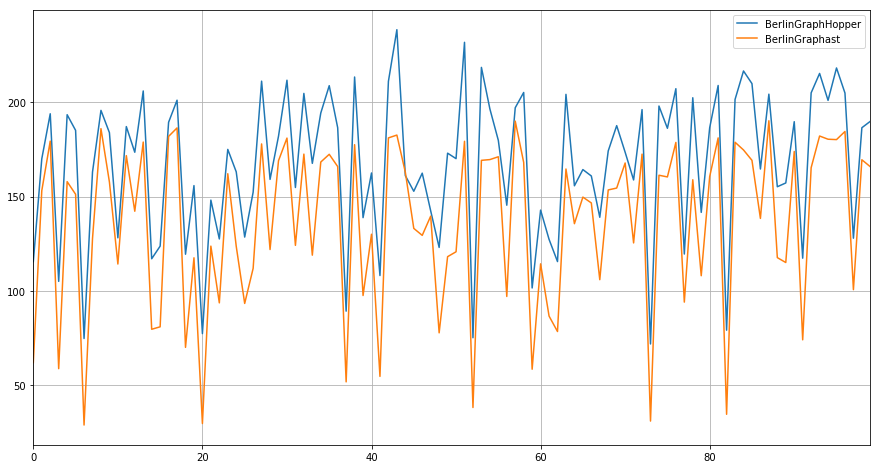

In [6]:
%config InlineBackend.figure_format = 'png'
distances = df.columns[1:]
#print(distances)
plot = df.loc[:,distances].plot(grid=True, figsize=(15,8)).legend(bbox_to_anchor=(1.0, 1))

### Histogram of the times

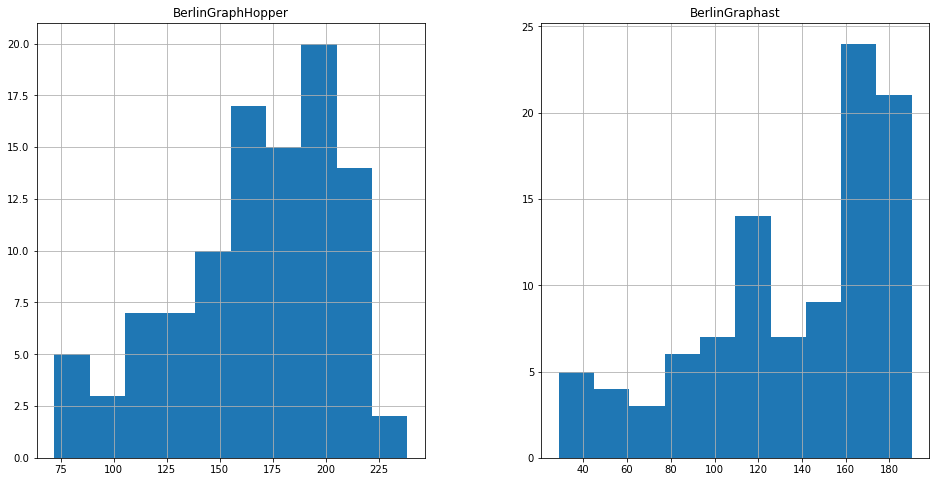

In [7]:
plot = df[["BerlinGraphHopper","BerlinGraphast"]].hist(figsize=(16,8))

### The data
In red, we have the algorithm that has taken more time to execute the search and, in green, the fastest one

In [9]:
col = {c:c.replace("Berlin","") for c in df.columns if c!="Distance(m)"}
df.rename(columns=col,inplace=True)
df.sort_values("Distance(m)")
s = df.style.apply(ut.highlight_max,subset=list(col.keys()),axis=1)\
    .apply(ut.highlight_min,subset=list(col.keys()),axis=1)\
    .set_properties(**{'text-align': 'right'})
    
display(HTML(s.render()))

## Loading the memory used in the algorithms

In [ ]:
memData = ut.loadMemoryData()

### Analysing general memory use

In [ ]:
ut.plotMemoryUse(memData)

### Vanila memory used

In [ ]:
ut.plotPie(memData,"Vanila")    

### GraphHopper memory used

In [ ]:
ut.plotPie(memData,"GraphHopper")

### GraphHopperContracted memory used

In [ ]:
ut.plotPie(memData,"GraphHopperContracted")

### Graphast memory used

In [ ]:
ut.plotPie(memData,"Graphast")

## Top 5 biggest classes from the algorithms:
#### VN - Vanila
#### GHC - GraphHopperContracted
#### GH - GraphHopper
#### GP - Graphast

In [ ]:
ut.plotTopMemoryClasses(memData)